In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
data = pd.read_csv(r"C:\Users\ok\Downloads\datasets_19_420_Iris.csv")

In [5]:
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
data = data.drop("Id", axis = 1)

In [12]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


# EDA

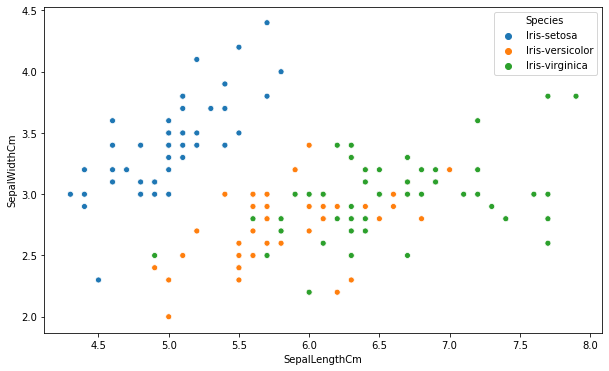

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm" , data = data , hue = "Species")
plt.show()

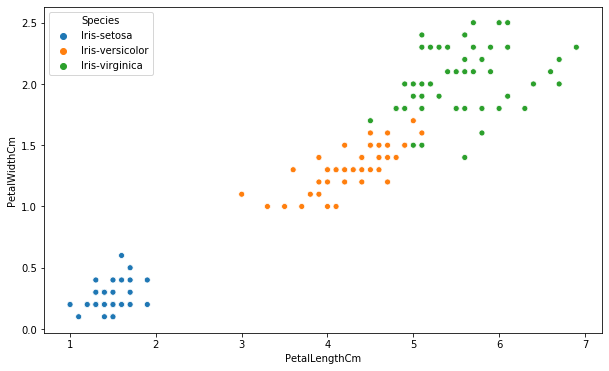

In [17]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm" , data = data , hue = "Species")
plt.show()

Petal Features are giving a better cluster decision boundaries between the species compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

In [69]:
data.corr().transpose()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


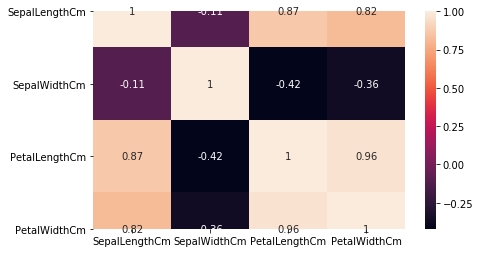

In [45]:
plt.figure(figsize = (7,4))
sns.heatmap(data.corr(), annot = True)
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

In [30]:
data.corr()["PetalWidthCm"].sort_values(ascending = False)[1:]  #removed PetalWidthcm correlation with itself

PetalLengthCm    0.962757
SepalLengthCm    0.817954
SepalWidthCm    -0.356544
Name: PetalWidthCm, dtype: float64

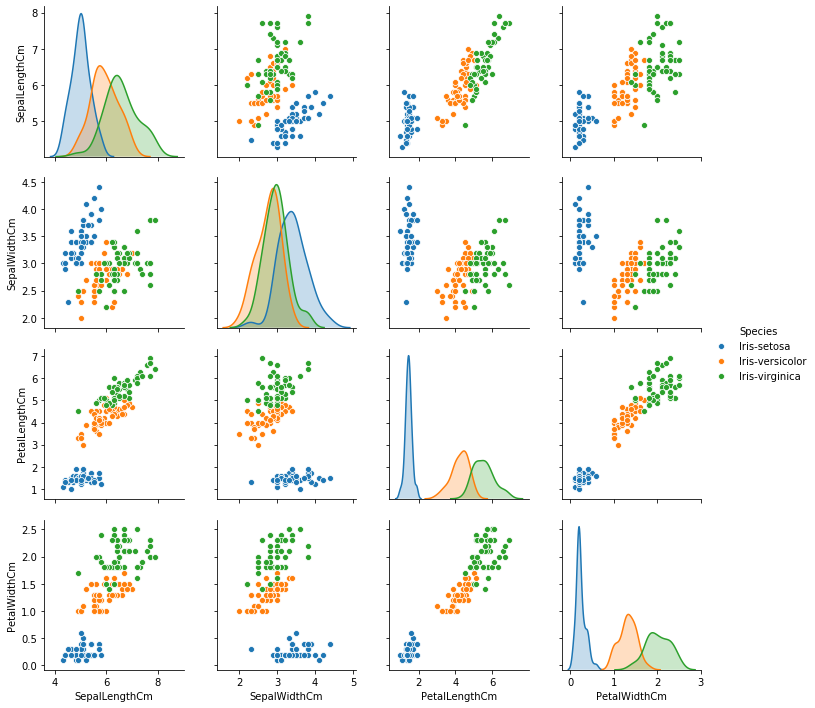

In [34]:
sns.pairplot(data, hue = "Species")
plt.show()

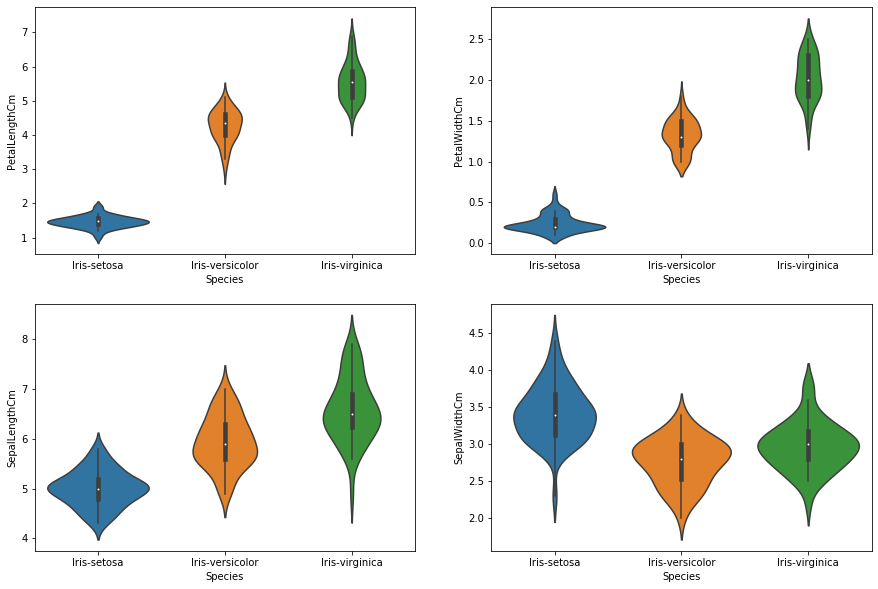

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)
plt.show()

In [35]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [40]:
data.shape

(150, 5)

In [46]:
X = data.iloc[:,:-1]

In [51]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [48]:
y = data.iloc[:,-1]

In [50]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

In [53]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0)

# SVM Model

In [55]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy of the SVM model is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM model is: 0.98


c:\users\ok\anaconda3\envs\mytfenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression

In [57]:
model = LogisticRegression(multi_class = "auto")
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9


c:\users\ok\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# CART

In [58]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.96


# KNN

In [59]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.96


In [62]:
a_index=list(range(1,11))
a = pd.Series()

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    a = a.append(pd.Series(metrics.accuracy_score(model.predict(test_X),test_y)))


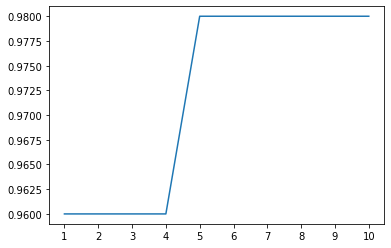

In [68]:
plt.plot(a_index, a)
plt.xticks(list(range(1,11)))
plt.show()

# Post removing PetalWidth

In [70]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [72]:
iris = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','Species']]

In [73]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...
145,6.7,3.0,5.2,Iris-virginica
146,6.3,2.5,5.0,Iris-virginica
147,6.5,3.0,5.2,Iris-virginica
148,6.2,3.4,5.4,Iris-virginica


In [74]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm
SepalLengthCm,1.000000,-0.109369,0.871754
SepalWidthCm,-0.109369,1.000000,-0.420516
PetalLengthCm,0.871754,-0.420516,1.000000


In [79]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [80]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4


In [81]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0)

# SVM

In [84]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy of the SVM model is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM model is: 0.96


c:\users\ok\anaconda3\envs\mytfenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression 

In [85]:
model = LogisticRegression(multi_class = "auto")
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.86


c:\users\ok\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# CART

In [86]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.96


# KNN

In [98]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))
print("Confusion_matrix in order 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ")
print(metrics.confusion_matrix(prediction,test_y, labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

The accuracy of the KNN is 0.92
Confusion_matrix in order 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 
[[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]
